In [39]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List
from time import time

In [29]:
def c(t, const):
   return const

def f(t:float, y:float, c:Callable, g:Callable)->float:
    return c(t)*y + g(t)

def df(t:float, y:float, c:Callable, g:Callable)->float: # d in terms of y
  return c(t)

In [30]:

def explicit_euler(a:float, b:float, N:int, f:Callable, y0:float)->np.ndarray:
    h = (b-a)/N
    t = a
    sol = np.zeros(N)
    sol[0] = y0
    for i in range(N-1):
        sol[i+1] = sol[i]+h*f(t, sol[i])
        t+=h
    return sol


In [31]:
def newton(f:Callable, df:Callable, x0, *args, tol = np.finfo(float).eps):
    x = x0
    h = args[0]
    t = args[1]
    err = 1.0
    while(err>tol):
        x_new = x- (x-x0-h*f(t,x))/(1-h*df(t,x))
        err= x_new-x
        x = x_new
    return x


def implicit_euler(a:float, b:float, N:int, f:Callable[[float, float], float],
                   df:Callable[[float, float], float], y0:float)->np.ndarray:
    h = (b-a)/N
    t = a
    sol = np.zeros(N)
    sol[0] = y0
    for i in range(N-1):
        sol[i+1] = newton(f, df, sol[i], h, t) #sol[i]+h*f(t, sol[i])
        t+=h
    return sol

In [32]:
def c_explicit(t):
    return c(t,1)

def g(t):
    return 0


sol=explicit_euler(0,1,1000,lambda t,x:f(t,x,c_explicit, g),1)

sol2=implicit_euler(0,1,1000,
                    lambda t,x:f(t,x,c_explicit, g),
                    lambda t,x:df(t,x,c_explicit, g),
                    1)


Text(0.5, 1.0, 'Test example for e^x')

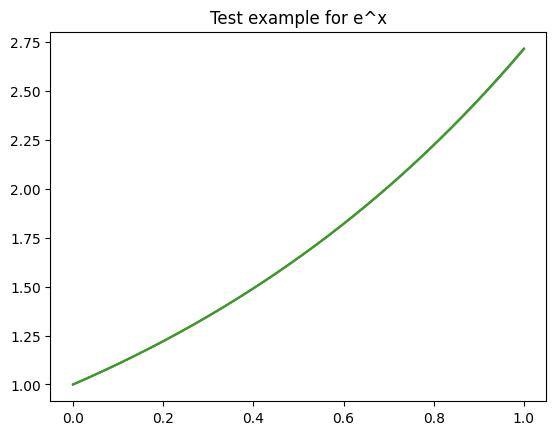

In [34]:
x = np.linspace(0,1,1000)
plt.plot(x, sol)
plt.plot(x, sol2)
plt.plot(x, np.exp(x))
plt.title("Test example for e^x")

In [57]:
Lamdas = [1,10,-1,-10]
name = [str(c) for c in C]
TRUE_SOL = [np.exp(c) for c in C]
steps = np.array([2** i for i in range(1,11)])

In [58]:
Imp = np.zeros((len(steps), len(Lamdas)))
Exp = np.zeros((len(steps), len(Lamdas)))

for i,step in enumerate(steps):
    for j, lamda in enumerate(Lamdas):

        def c_explicit(t):
            return c(t,lamda)
        
        imp_sol = implicit_euler(0,1,step, 
                                 lambda x,t:f(x,t, c_explicit, g),
                                 lambda x,t:df(x,t,c_explicit,g), 
                                 1)
        
        exp_sol = explicit_euler(0,1, step, 
                                 lambda x, t: f(x,t,c_explicit,g),
                                  1)

        Imp[i, j] = np.abs(imp_sol[-1]-TRUE_SOL[j])
        Exp[i, j] = np.abs(exp_sol[-1]-TRUE_SOL[j])



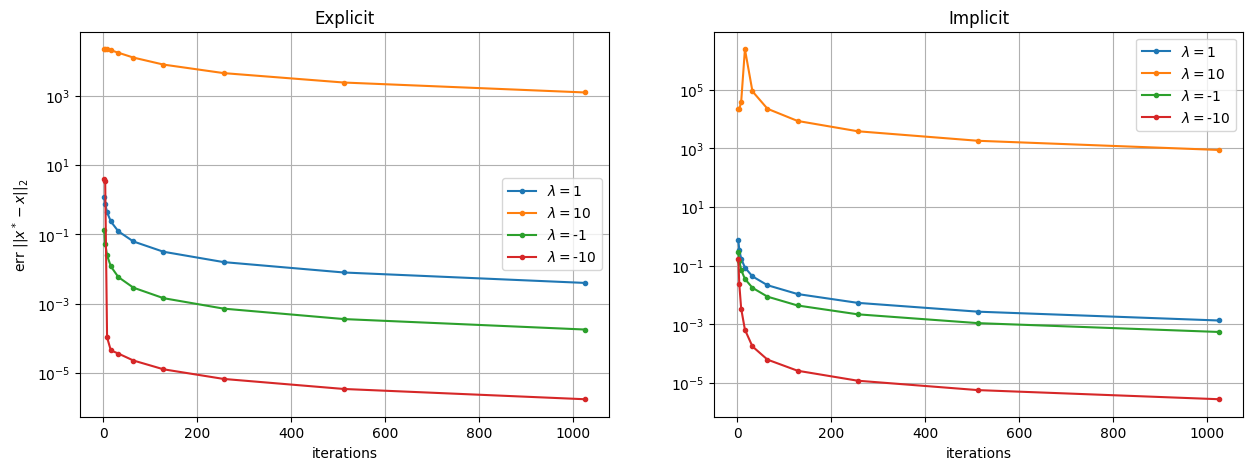

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
for j, lamda in enumerate(Lamdas):
    ax1.plot(steps, Exp[:,j], marker = '.', label = '$\lambda = $' + str(lamda))

for j, lamda in enumerate(Lamdas):
    ax2.plot(steps, Imp[:,j], marker = '.', label = '$\lambda = $' + str(lamda))

ax1.set(xlabel='iterations', title='Explicit', yscale = 'log')
ax2.set(xlabel='iterations', title='Implicit', yscale = 'log')

ax1.set_ylabel('err $|| x^* - x ||_2$')    
ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()